In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/train_dataframes.csv')
data = data[::24]
data

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
24,2015-02-01 01:00:00,873.3819,924.2795,944.0556,905.487275,2,1,0,0,1,25.448450,904.3712
48,2015-02-02 01:00:00,898.0128,941.5469,928.5338,919.028000,3,0,0,0,1,25.584375,905.0674
72,2015-02-03 01:00:00,848.3934,963.5070,914.6895,906.026700,4,0,0,0,1,26.011926,942.6513
96,2015-02-04 01:00:00,837.0560,978.6654,940.4568,918.726067,5,0,0,0,1,25.632257,954.0226
...,...,...,...,...,...,...,...,...,...,...,...,...
36600,2019-04-05 01:00:00,1128.4495,1068.8083,1055.8083,1084.355367,7,0,0,0,1,25.537500,1099.8831
36624,2019-04-06 01:00:00,1204.5668,1117.8152,1069.8917,1114.255575,1,1,0,0,1,25.960168,1085.4864
36648,2019-04-07 01:00:00,1068.4582,1137.6306,1069.1392,1092.644675,2,1,0,0,1,26.040552,1069.5315
36672,2019-04-08 01:00:00,1067.6071,1102.4937,1059.0732,1076.278625,3,0,0,0,1,26.620172,1030.9882


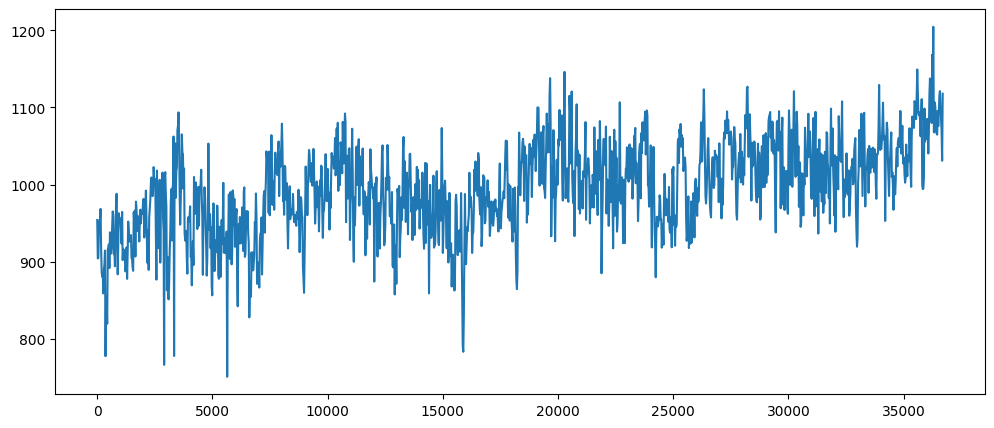

In [ ]:
data['DEMAND'][:2400].plot(figsize=(12,5))
data = data[:2400]

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     datatest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",datatest[0])
     print("2. P-Value : ", datatest[1])
     print("3. Num Of Lags : ", datatest[2])
     print("4. Num Of Observations Used For ADF Regression:",      datatest[3])
     print("5. Critical Values :")
     for key, val in datatest[4].items():
         print("\t",key, ": ", val)
ad_test(data['DEMAND'])

1. ADF :  -3.593793689549637
2. P-Value :  0.005880793621818783
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 1508
5. Critical Values :
	 1% :  -3.4346938104971554
	 5% :  -2.863458518103151
	 10% :  -2.567791394384679


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['DEMAND'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15519.052, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15902.556, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15789.142, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15651.080, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15900.565, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15519.333, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15519.335, Time=1.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15520.303, Time=2.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15520.028, Time=4.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15517.341, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15537.696, Time=0.70 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15697.313, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15516.299, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15649.145, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0

In [ ]:
print(data.shape)
train=data.iloc[:-300]
test=data.iloc[-300:]
print(train.shape,test.shape)

(1530, 12)
(1230, 12) (300, 12)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['DEMAND'],order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 DEMAND   No. Observations:                 1230
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6250.752
Date:                Sat, 01 Jun 2024   AIC                          12507.504
Time:                        12:35:21   BIC                          12522.846
Sample:                             0   HQIC                         12513.277
                               - 1230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4524      0.026     17.176      0.000       0.401       0.504
ma.L1         -0.9249      0.014    -65.297      0.000      -0.953      -0.897
sigma2      1530.5439     46.822     32.689      0.000    1438.775    1622.313
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               257.97
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

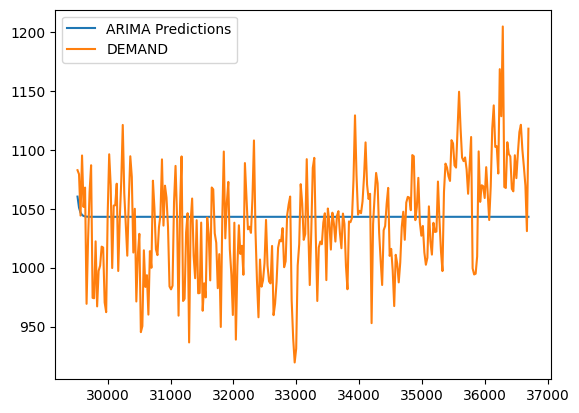

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['DEMAND'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['DEMAND'],pred))
rmse

45.386526260517655